# Aprendizaje Estadístico y Data Mining

## Práctica 1: Reglas de Asociación

### Objetivo
Usa  la  librería  *mlxtend*  que  nos  permita  solucionar  todos  los problemas  relacionados  con  las  reglas  de asociación. Para ello tendremos que usar el algoritmo Apriori y una serie de métodos para obtener la distinta 
información  que  este  genera.  Usaremos  la  librería  con  el  Dataset **Supermercado.csv**  que  se  ha  proporcionado. Prueba al menos tres configuraciones de soporte y da respuesta a las siguientes preguntas. Estas deben estar sustentadas con datos obtenidos durante la práctica y razonadas debidamente. 

> Nota: También se pueden usar otras librerías como Orange3-Associate o Efficient-A priori.

* [Link al dataset.](./data/Supermercado.csv)

**Enunciado:** Con un soporte mínimo bajo explica que itemsets frecuentes se generan. Interpreta al menos dos de las reglas
que se obtienen con dicho soporte.

**Solución**



In [102]:
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import pandas as pd
import warnings


In [ ]:
ruta_archivo = "./resources/Supermercado.csv"
df_original = pd.read_csv(ruta_archivo, header=None)
# Convertimos cada fila en una lista de productos
df_original[0] = df_original[0].str.split(", ")
# Eliminamos la primera fila, que contiene "Ticket" 
df_original = df_original.iloc[1:].reset_index(drop=True)
df_original = df_original[0]

# Transformamos al formato correcto utilizando mlxtend, y el Transaction Encoder para facilitarle el trabajo al PC.
transaction_encoder = TransactionEncoder()
te_ary = transaction_encoder.fit(df_original).transform(df_original)
df = pd.DataFrame(te_ary, columns=transaction_encoder.columns_)


    Aceite de oliva   Agua  Arroz  Azúcar   Café  Carne  Cebollas  Chocolate  \
0             False  False  False   False  False  False     False      False   
1             False  False  False    True  False  False     False      False   
2             False  False   True   False   True  False      True      False   
3             False  False  False   False  False  False     False      False   
4              True  False  False   False  False   True     False      False   
..              ...    ...    ...     ...    ...    ...       ...        ...   
65            False  False  False   False  False  False     False      False   
66            False  False  False   False  False  False     False      False   
67            False  False  False   False  False  False     False      False   
68            False  False  False   False  False  False     False      False   
69             True  False  False   False  False  False     False      False   

    Galletas  Harina  ...  Pasta  Patat

**Enunciado:** Qué tipo reglas desaparecen según aumentamos el valor de los soportes usados? ¿Por qué?

**Solución**

# Itemsets frecuentes generados con un Soporte mínimo muy bajo (0.05)

Con un umbral mínimo que recoge aquellos itemsets que estén en al menos el 5% de las transacciones, generamos dos tipos de itemsets frecuentes: 

In [ ]:
min_support = 0.05

# Generamos todos los itemsets frecuentes, eliminando aquellos que no cumplen con el soporte mínimo
itemsets_frecuentes = apriori(df, min_support, use_colnames=True)

#Asignamos longitud (k) a cada itemset frecuente en una columna extra.
itemsets_frecuentes['length'] = itemsets_frecuentes['itemsets'].apply(lambda x: len(x))


     support                  itemsets  length
0   0.114286         (Aceite de oliva)       1
1   0.085714                   (Arroz)       1
2   0.142857                  (Azúcar)       1
3   0.142857                    (Café)       1
4   0.085714                   (Carne)       1
5   0.128571                (Cebollas)       1
6   0.071429               (Chocolate)       1
7   0.214286                (Galletas)       1
8   0.100000                  (Harina)       1
9   0.085714                  (Huevos)       1
10  0.114286                   (Jabón)       1
11  0.457143                   (Leche)       1
12  0.085714                 (Lechuga)       1
13  0.085714                (Manzanas)       1
14  0.085714                     (Pan)       1
15  0.057143                   (Pasta)       1
16  0.100000                 (Patatas)       1
17  0.100000                 (Pescado)       1
18  0.128571                (Plátanos)       1
19  0.100000                   (Queso)       1
20  0.071429 

## 1-Itemsets-Frecuentes
Observando la tabla, los Items individuales más frecuentes son la Leche (45%), las Galletas (21%) y el Té (15%). Son items bastante comunes en todas las cestas de la compra de las familias de España.
Por otro lado, nos sorprende que productos como el Chocolate (7%), los Tomates(7%) o la Carne(8.6%) sean tan poco frecuentes.

In [199]:
print(itemsets_frecuentes[itemsets_frecuentes['length'] == 1])

     support           itemsets  length
0   0.114286  (Aceite de oliva)       1
1   0.085714            (Arroz)       1
2   0.142857           (Azúcar)       1
3   0.142857             (Café)       1
4   0.085714            (Carne)       1
5   0.128571         (Cebollas)       1
6   0.071429        (Chocolate)       1
7   0.214286         (Galletas)       1
8   0.100000           (Harina)       1
9   0.085714           (Huevos)       1
10  0.114286            (Jabón)       1
11  0.457143            (Leche)       1
12  0.085714          (Lechuga)       1
13  0.085714         (Manzanas)       1
14  0.085714              (Pan)       1
15  0.057143            (Pasta)       1
16  0.100000          (Patatas)       1
17  0.100000          (Pescado)       1
18  0.128571         (Plátanos)       1
19  0.100000            (Queso)       1
20  0.071429          (Tomates)       1
21  0.157143               (Té)       1
22  0.142857            (Yogur)       1
23  0.128571       (Zanahorias)       1


## 2-Itemsets-frecuentes
En cuanto a los itemsets con 2 individuos, únicamente podemos generar 10 de ellos. La mayoría de estos itemsets tienen como componente la Leche, ya que según 'Leche Pascual', cada español consume 70 litros por año aproximadamente. 

In [200]:
print(itemsets_frecuentes[itemsets_frecuentes['length'] == 2])

     support                  itemsets  length
24  0.057143  (Aceite de oliva, Leche)       2
25  0.057143         (Cebollas, Arroz)       2
26  0.057143            (Leche, Arroz)       2
27  0.057143           (Leche, Azúcar)       2
28  0.071429             (Café, Leche)       2
29  0.071429         (Cebollas, Leche)       2
30  0.100000         (Leche, Galletas)       2
31  0.071429         (Plátanos, Leche)       2
32  0.085714               (Té, Leche)       2
33  0.071429       (Zanahorias, Leche)       2


# Interpretación de reglas generadas

Utilizando mlxtend, se generarán las reglas candidatas, eliminando aquellas que no cumplan con una confianza del 40%, que no es muy exigente.

In [201]:
reglas = association_rules(itemsets_frecuentes, metric="confidence", min_threshold=0.4)
reglas[(reglas['confidence'] > 0.4)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Aceite de oliva),(Leche),0.114286,0.457143,0.057143,0.500000,1.093750,1.0,0.004898,1.085714,0.096774,0.111111,0.078947,0.312500
1,(Cebollas),(Arroz),0.128571,0.085714,0.057143,0.444444,5.185185,1.0,0.046122,1.645714,0.926230,0.363636,0.392361,0.555556
2,(Arroz),(Cebollas),0.085714,0.128571,0.057143,0.666667,5.185185,1.0,0.046122,2.614286,0.882812,0.363636,0.617486,0.555556
3,(Arroz),(Leche),0.085714,0.457143,0.057143,0.666667,1.458333,1.0,0.017959,1.628571,0.343750,0.117647,0.385965,0.395833
5,(Café),(Leche),0.142857,0.457143,0.071429,0.500000,1.093750,1.0,0.006122,1.085714,0.100000,0.135135,0.078947,0.328125
6,(Cebollas),(Leche),0.128571,0.457143,0.071429,0.555556,1.215278,1.0,0.012653,1.221429,0.203279,0.138889,0.181287,0.355903
7,(Galletas),(Leche),0.214286,0.457143,0.100000,0.466667,1.020833,1.0,0.002041,1.017857,0.025974,0.175000,0.017544,0.342708
8,(Plátanos),(Leche),0.128571,0.457143,0.071429,0.555556,1.215278,1.0,0.012653,1.221429,0.203279,0.138889,0.181287,0.355903
9,(Té),(Leche),0.157143,0.457143,0.085714,0.545455,1.193182,1.0,0.013878,1.194286,0.192090,0.162162,0.162679,0.366477
10,(Zanahorias),(Leche),0.128571,0.457143,0.071429,0.555556,1.215278,1.0,0.012653,1.221429,0.203279,0.138889,0.181287,0.355903


### Regla 7: $(Galletas) ->(Leche)$
Cuando un cliente compra Galletas, existe una probabilidad decente de que compre Leche también. 
Basándonos en los resultados,  tenemos un 45.7% de confianza de que esta regla tendrá éxito. Además, el soporte nos indica que esta combinación de items se encuentra en el 10% de todas las transacciones, lo que signficia que es bastante común entre los clientes.

Sin embargo, si vemos la métrica de Lift, podemos concluir que esta relación es casi aleatoria, dado que Lift es cercano a 1. Es decir, aunque mucha gente compre ambos productos juntos, la compra de Galletas no influye directamente en la compra de Leche.

En un contexto realista, puedes interpretar que en la zona en la que se encuentre este supermercaado la gente prefiera desayunar cereales con leche, y dejen las galletas para la merienda.
### Regla 8: $(Plátanos) ->(Leche)$
Cuando un cliente compra Plátanos, existe una probabilidad decente de que compre Leche también. 
Basándonos en los resultados,  tenemos un 55.5% de confianza de que esta regla tendrá éxito. Además, el soporte nos indica que esta combinación de items se encuentra en el 7% de todas las transacciones, lo que signficia que es mínimamente común entre los clientes.

Además, si vemos la métrica de Lift, podemos concluir que se trata de una asociación positivamente correlada, lo que indica que la compra de Plátanos impulsa a la compra de Leche. 

Probablemente sea el caso de aquellas personas que van al gimnasio, e ingieren muchos batidos de proteínas, por ejemplo.


# Aumento uniforme del Soporte Mínimo

Este dataset muestra una gran diversidad de los datos, lo que podría significar que las familias que hicieron la compra esos días eran de partes muy distintas de España.

Es por ello que, a medida que aumentemos el Soporte mínimo, vamos a ver cómo la cantidad de itemsets frecuentes disminuye drásticamente. 

Probaremos con este rango = [0.05, 0.1, 0.15, 0.2, 0.25]

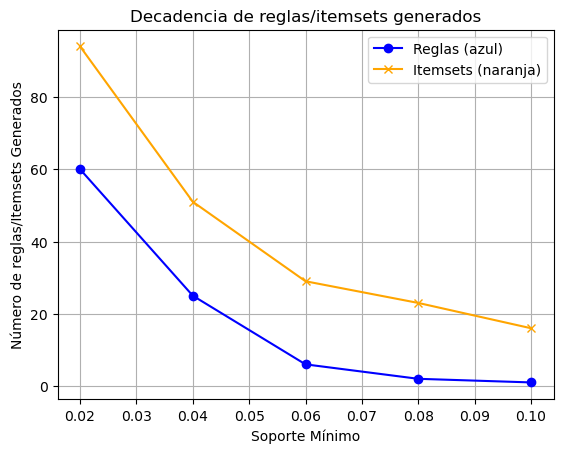

In [185]:
warnings.filterwarnings('ignore', category=DeprecationWarning)

soportes_minimos = [0.02, 0.04, 0.06, 0.08, 0.10]
numero_itemsets = []
reglas_generadas = []
numero_reglas = []
for soporte in soportes_minimos:
    itemsets_frec = apriori(df, min_support=soporte, use_colnames=True)
    numero_itemsets.append(len(itemsets_frec))
    reglas = association_rules(itemsets_frec, metric="confidence", min_threshold=0.4)
    reglas_filtradas = reglas[reglas['confidence'] > 0.4]
    reglas_generadas.append({
        'soporte': soporte,
        'reglas': reglas_filtradas
    })
    numero_reglas.append(len(reglas))
  
# Graficamos los resultados para ver la comparación y la caída de número de itemsets
plt.plot(soportes_minimos, numero_reglas, marker='o', label='Reglas (azul)', color='blue')
plt.plot(soportes_minimos, numero_itemsets, marker='x', label='Itemsets (naranja)', color='orange')
plt.title('Decadencia de reglas/itemsets generados')
plt.xlabel('Soporte Mínimo')
plt.ylabel('Número de reglas/Itemsets Generados')
plt.legend()
plt.grid(True)
plt.show()


### Interpretación del Grafo
Para dar contexto, ya sabemos de antemano que la Leche es el 1-itemset más frecuente de todo el dataset, y que la Carne es de los menos frecuentes.

Imaginemos que estamos evaluando el soporte mínimo más bajo del rango (0.02), veamos las reglas que se generan:

In [186]:
# Mostramos todas las reglas que se generaron el rango 0 de soportes mínimos.
print('Regla Pan->Leche:\n', reglas_generadas[0]['reglas'].iloc[14], '\n\n')

Regla Pan->Leche:
 antecedents              (Pan)
consequents            (Leche)
antecedent support    0.085714
consequent support    0.457143
support               0.042857
confidence                 0.5
lift                   1.09375
representativity           1.0
leverage              0.003673
conviction            1.085714
zhangs_metric          0.09375
jaccard               0.085714
certainty             0.078947
kulczynski            0.296875
Name: 19, dtype: object 




El pan es un producto que tiene un soporte muy bajo en el dataset original, ya que solamente aparece en el 8% de las transacciones totales. Sin embargo, la leche aparece en el 46% de ellas. Como el soporte mínimo es bajo, es muy probable que se generen reglas que relacionen productos poco frecuentes con productos poco frecuentes.

Es por esta razón por la que aparece la regla de $$Pan->Leche$$

Sin embargo, mostrames las reglas generadas en el soporte mínimo más alto (0.1) y veamos las diferentes reglas que se generaron:

In [184]:
print('Reglas con Soporte Minimo 0.1\n', reglas_generadas[4]['reglas'])

Reglas con Soporte Minimo 0.1
   antecedents consequents  antecedent support  consequent support  support  \
0  (Galletas)     (Leche)            0.214286            0.457143      0.1   

   confidence      lift  representativity  leverage  conviction  \
0    0.466667  1.020833               1.0  0.002041    1.017857   

   zhangs_metric  jaccard  certainty  kulczynski  
0       0.025974    0.175   0.017544    0.342708  


Como se puede apreciar, sólo se generó una regla. Los productos que aparecen son los más frecuentes de todo el dataset, y no se trata de una casualidad (Aparecen Galletas  y Leche en el 21 y 46% de las transacciones). 

El algoritmo a priori tiende a relacionar a aquellos productos que son más frecuentes, y es por ello por lo que los productos menos frecuentes no van a ser asociados a los más frecuentes.

# Confianza
La confianza determina el porcentaje de éxito de las reglas generadas contrastadas con el dataset original.

### Confianza en 20%
Con un soporte mínimo de 0.03, vemos como la cantidad de reglas generadas con una confianza de un 20% es grande. Fijándonos en la métrica Lift, podemos ver como en la mayoría de ellas el antecedente está positivamente correlado con el consecuente.

In [209]:
min_support = 0.03

itemsets_frecuentes = apriori(df, min_support, use_colnames=True)
reglas = association_rules(itemsets_frecuentes, metric="confidence", min_threshold=0.2)
reglas[(reglas['confidence'] > 0.2)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Aceite de oliva),(Leche),0.114286,0.457143,0.057143,0.500000,1.093750,1.0,0.004898,1.085714,0.096774,0.111111,0.078947,0.312500
1,(Aceite de oliva),(Patatas),0.114286,0.100000,0.042857,0.375000,3.750000,1.0,0.031429,1.440000,0.827957,0.250000,0.305556,0.401786
2,(Patatas),(Aceite de oliva),0.100000,0.114286,0.042857,0.428571,3.750000,1.0,0.031429,1.550000,0.814815,0.250000,0.354839,0.401786
3,(Cebollas),(Arroz),0.128571,0.085714,0.057143,0.444444,5.185185,1.0,0.046122,1.645714,0.926230,0.363636,0.392361,0.555556
4,(Arroz),(Cebollas),0.085714,0.128571,0.057143,0.666667,5.185185,1.0,0.046122,2.614286,0.882812,0.363636,0.617486,0.555556
5,(Arroz),(Leche),0.085714,0.457143,0.057143,0.666667,1.458333,1.0,0.017959,1.628571,0.343750,0.117647,0.385965,0.395833
6,(Azúcar),(Leche),0.142857,0.457143,0.057143,0.400000,0.875000,1.0,-0.008163,0.904762,-0.142857,0.105263,-0.105263,0.262500
7,(Té),(Azúcar),0.157143,0.142857,0.042857,0.272727,1.909091,1.0,0.020408,1.178571,0.564972,0.166667,0.151515,0.286364
8,(Azúcar),(Té),0.142857,0.157143,0.042857,0.300000,1.909091,1.0,0.020408,1.204082,0.555556,0.166667,0.169492,0.286364
9,(Café),(Galletas),0.142857,0.214286,0.042857,0.300000,1.400000,1.0,0.012245,1.122449,0.333333,0.136364,0.109091,0.250000


## Confianza en 60%
Con un soporte mínimo de 0.03, vemos como la cantidad de reglas generadas con una confianza de un 60% es imnesamente inferior. Es tarea dificil obtener reglas con un porcentaje de confianza muy elevado con un dataset de tales dimensiones, por lo que es lógico que al incrementar la confianza se decremente el número de reglas aptas.

In [211]:
itemsets_frecuentes = apriori(df, min_support, use_colnames=True)
reglas = association_rules(itemsets_frecuentes, metric="confidence", min_threshold=0.6)
reglas[(reglas['confidence'] > 0.6)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Arroz),(Cebollas),0.085714,0.128571,0.057143,0.666667,5.185185,1.0,0.046122,2.614286,0.882812,0.363636,0.617486,0.555556
1,(Arroz),(Leche),0.085714,0.457143,0.057143,0.666667,1.458333,1.0,0.017959,1.628571,0.343750,0.117647,0.385965,0.395833
2,(Tomates),(Yogur),0.071429,0.142857,0.042857,0.600000,4.200000,1.0,0.032653,2.142857,0.820513,0.250000,0.533333,0.450000


### Interpretar la regla más significativa
La regla que más nos llama la atención es la de: $$Arroz -> Leche$$
Es una regla que no nos descubre un mundo nuevo, pero nos sirve para ver que el modelo está logrando asociaciones lógicas, ya que el arroz con leche se hace con arroz y con leche, y la gente que compra uno es más propensa a comprar lo otro probablemente para hacer dicho postre.

Esta regla aparece tanto en las reglas con un 20% de confianza como en las del 70%, lo que nos reafirma en la teoría de que ambos productos tienden a comprarse a la vez.

Además su índice de Lift, mayor que 1, nos indice que están correlados positivamente.


**Enunciado:** Establece ahora el soporte mínimo a 0,3 y juega con la confianza. Primero establécela en un valor bajo y luego en uno alto. Explica que cambios ves en las reglas y porque crees que ocurren dichos cambios. Interpreta la regla que veas más significativa.

**Solución**

**Enunciado:** Obtén una configuración de soporte y confianza que funcione mejor según tu criterio. Razona y explica cómo has tomado la decisión.

**Solución**

**Enunciado:** Dadas la que consideres mejor configuración de soporte y confianza. ¿Existen reglas o patrones que se repitan? ¿Podemos generalizar de alguna manera como se comportan los clientes del supermercado?

**Solución**

**Enunciado:** Con los resultados del apartado anterior, interpreta que ocurre con el lift para al menos dos instancias. 

**Solución**

**Enunciado:** Con la configuración anterior. Primero elimina un número de instancias del producto que crea que es más crítico para generar reglas (deja al menos una instancia). Segundo, realiza un proceso parecido, pero eliminando transacciones. ¿Qué ves que ocurre? Razona porque sucede esto.

**Solución**